In [1]:
from pymouse.io import OrigPreprocessor
from pymouse.utils.data_loader import load_data
import os
repos_path = r'C:\Users\Joseph\Downloaded_Code\Natural-Mouse-Movements-Neural-Networks'
train_data_path = os.path.join(repos_path, 'train\\data.json')
# list of dictionaries
(train_inputs, train_paths, train_time) = load_data(train_data_path)
print(len(train_inputs))

preprocessor = OrigPreprocessor(model_mode='lstm', combine_dt=False,
                                reflect_coords=True)
coords, dest, dt_arr = preprocessor.preprocess_coords_dt(train_paths, train_time)
coords.max(), coords.min(), dt_arr.max(), dt_arr.min(), coords.shape, dest.shape, dt_arr.shape

21417
X, Y Maxes for (+) (+): [1, 1]
dt min max: [0, 1]
X Scale Factor: 0.9090909090909091
Y Scale Factor: 0.00017418568193694478


(1.0, -1.0, 1.0, 0.0, (85668, 100, 2), (85668, 2), (21417, 100, 1))

In [2]:
preprocessor = OrigPreprocessor(model_mode='lstm', combine_dt=True,
                                reflect_coords=True)
coords_dt, dest = preprocessor.preprocess_coords_dt(train_paths, train_time)
coords_dt.max(), coords_dt.min(), dest.max(), dest.min(), coords_dt.shape, dest.shape

X, Y Maxes for (+) (+): [1, 1]
dt min max: [0, 1]
X Scale Factor: 0.9090909090909091
Y Scale Factor: 0.00017418568193694478


(1.0, -1.0, 1.0, -1.0, (85668, 100, 3), (85668, 2))

In [3]:
preprocessor = OrigPreprocessor(model_mode='ann', combine_dt=True,
                                reflect_coords=True)
coords_dt, dest = preprocessor.preprocess_coords_dt(train_paths, train_time)
coords_dt.max(), coords_dt.min(), dest.max(), dest.min(), coords_dt.shape, dest.shape

X, Y Maxes for (+) (+): [1924, 1924]
dt min max: None
X Scale Factor: 1749.090909090909
Y Scale Factor: 0.33513325204668176


(1924.0, -1924.0, 1924.0, -1924.0, (85668, 100, 3), (85668, 2))

In [4]:
preprocessor = OrigPreprocessor(model_mode='ann', combine_dt=False,
                                reflect_coords=True)
coords, dest, dt_arr = preprocessor.preprocess_coords_dt(train_paths, train_time)
coords.max(), coords.min(), dt_arr.max(), dt_arr.min(), coords.shape, dest.shape, dt_arr.shape

X, Y Maxes for (+) (+): [1924, 1924]
dt min max: None
X Scale Factor: 1749.090909090909
Y Scale Factor: 0.33513325204668176


(1924.0, -1924.0, 1.8265624, 0.0, (85668, 100, 2), (85668, 2), (21417, 100, 1))

In [30]:
save_dict = {
    'coords': coords,
    'dt': dt_arr,
}

import pickle
with open(r'C:\Users\Joseph\ml_projects\orig_preprocessed_data.pickle', 'wb') as fp:
    pickle.dump(save_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
def plot_paths(paths):
    """Utility function to plot to an existing plt.figure.
    """
    for path in paths:
        X = []
        Y = []

        for point in path:
            X.append(point[0])
            Y.append(point[1])

        plt.plot(X, Y)
    return

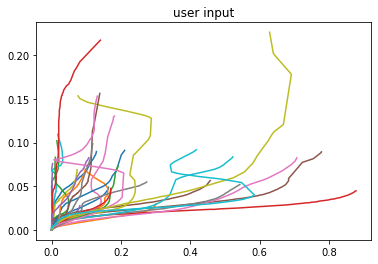

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.title('user input')
i = 30
plot_paths(coords[:i])
plt.show()

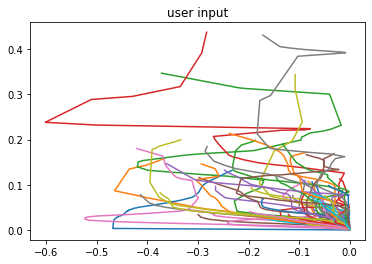

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.title('user input')
i_start, i_end = (25000, 25000+50)
plot_paths(coords[i_start:i_end])
plt.show()